<h2> Assess vanilla VAE and genRKM models</h2>

In [1]:
from class_Adv_attack_genRKM import Adv_attack_genRKM
import importlib
import torch
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import math

c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#attack_genRKM = Adv_attack_genRKM('out/MINST_adv_linf_RKM_h_128_epoch200', False)
#attack_genRKM = Adv_attack_genRKM('out/MNIST_adv_linf_RKM_h_500', False)
#attack_genRKM = Adv_attack_genRKM('out/MNIST_adv_RKM_h128_perturb5', False)
#attack_genRKM = Adv_attack_genRKM('out/MNIST_adv_RKM_h128_epoch300_pertub20', False)
#attack_genRKM = Adv_attack_genRKM('out/MNIST_adv_linf_RKM_h_500_WITHlinear_v2','out/VAE_00001LR_300epo_5kN_500h_adv_extralinear.pth', 500, False)

#attack_VAE = Adv_attack_genRKM('out/MNIST_adv_linf_RKM_h_500_WITHlinear_v2','out/VAE_00001LR_300epo_5kN_500h_adv_extralinear.pth', 500, True)
#out/VAE_0001LR_300epo_5kN_64h_adv.pth

#attack_genRKM = Adv_attack_genRKM('out/MNIST_adv_RKM_full_h128_epoch300_perturb50','out/VAE_0001LR_300epo_5kN_100BS_CNN_adv.pth', 128, False)

#attack_VAE = Adv_attack_genRKM('out/MNIST_adv_RKM_full_h128_epoch300_perturb50','out/VAE_0001LR_300epo_5kN_100BS_CNN_adv.pth', 128, True)

attack_genRKM = Adv_attack_genRKM('out/MNIST_adv_RKM_h128_epoch200_pert30_oneview','out/VAE_0001LR_300epo_5kN_100BS_CNN_adv.pth', 128, False,True)

attack_VAE = Adv_attack_genRKM('out/MNIST_adv_RKM_h128_epoch200_pert30_oneview','out/VAE_0001LR_300epo_5kN_100BS_CNN_adv.pth', 128, True, True)

 my filename c:\Users\gcorl\AppData\Roaming\jupyter\runtime\kernel-v2-145645DK34oq53kCG.json
Loading pretrained model LPIPS from C:\Users\gcorl\.cache\torch\hub\checkpoints\LPIPS_v0.1_alex-df73285e.pth
<class 'Architecture_VAE.Model'>
 my filename c:\Users\gcorl\AppData\Roaming\jupyter\runtime\kernel-v2-145645DK34oq53kCG.json
Loading pretrained model LPIPS from C:\Users\gcorl\.cache\torch\hub\checkpoints\LPIPS_v0.1_alex-df73285e.pth
<class 'Architecture_VAE.Model'>


Plot the 25 images: original image and the reconstruction

c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\class_Adv_attack_genRKM.py:251: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.image_adv = torch.tensor(self.image_ori, requires_grad=True)


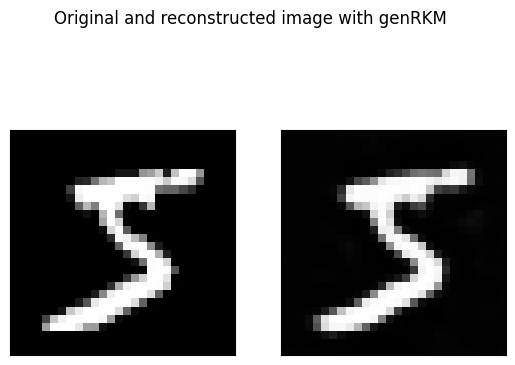

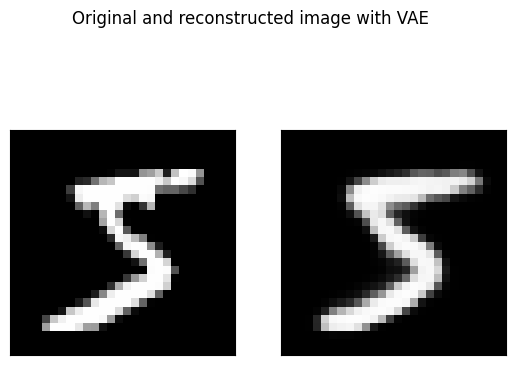

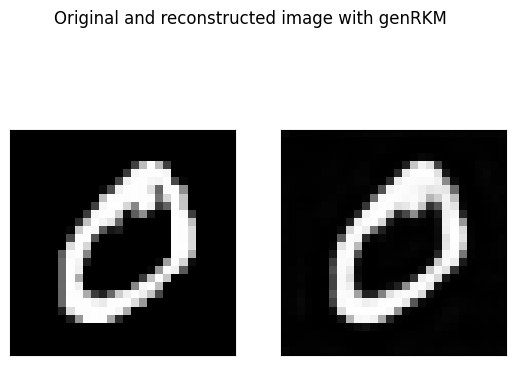

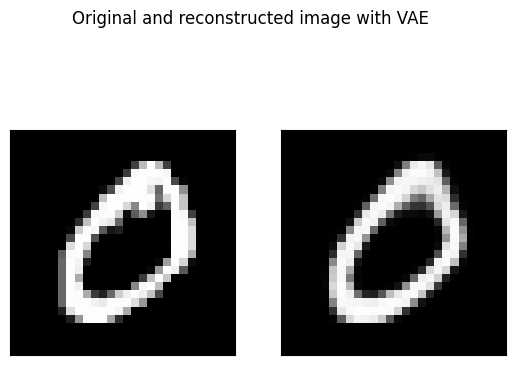

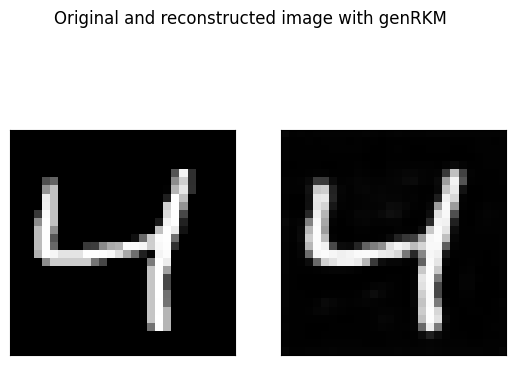

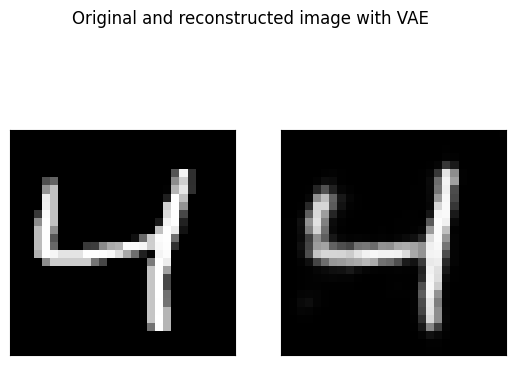

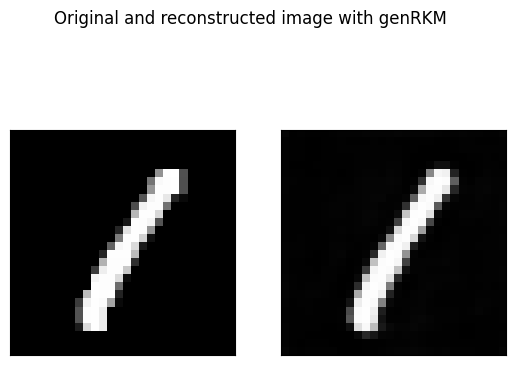

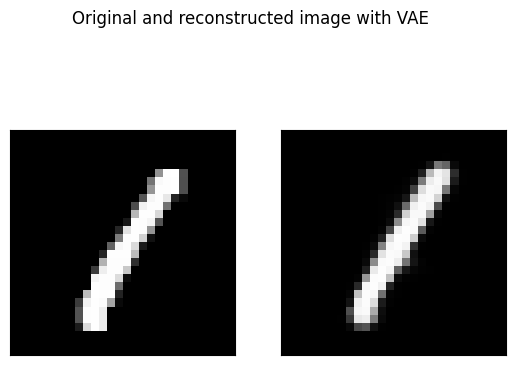

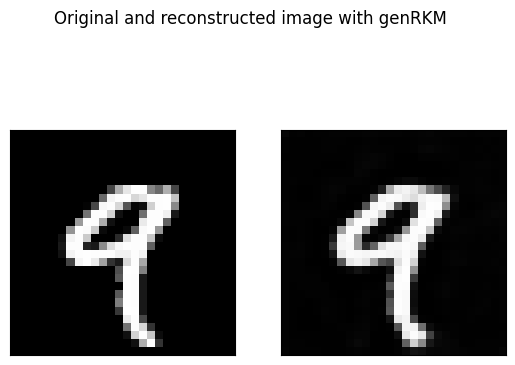

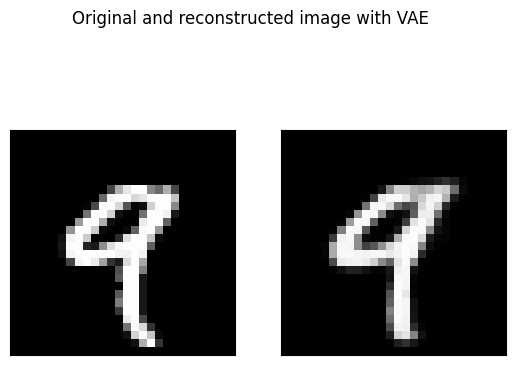

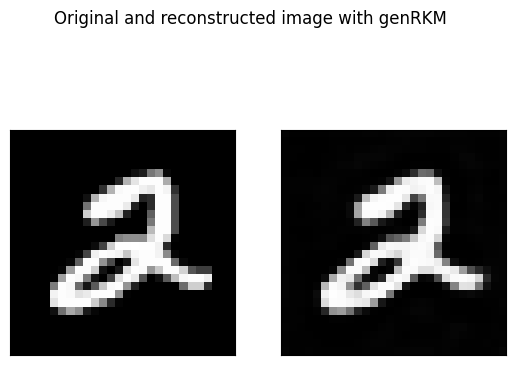

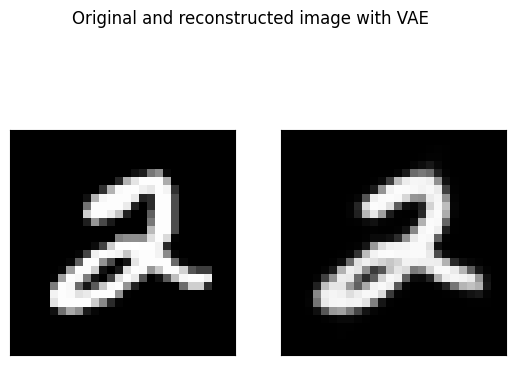

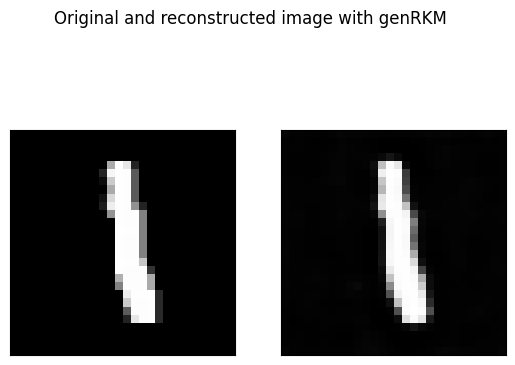

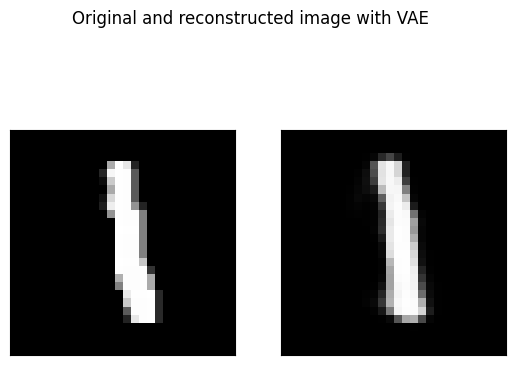

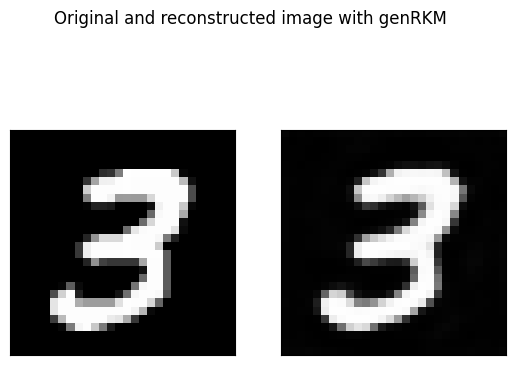

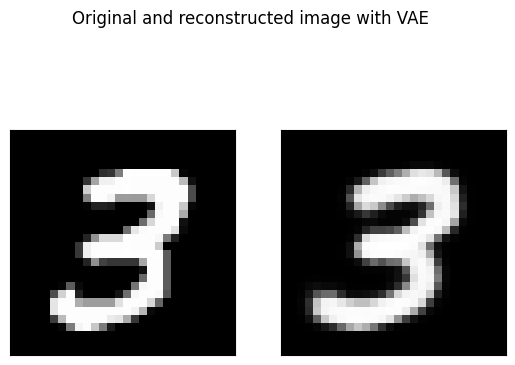

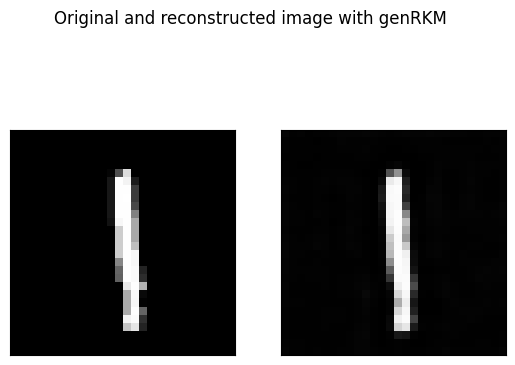

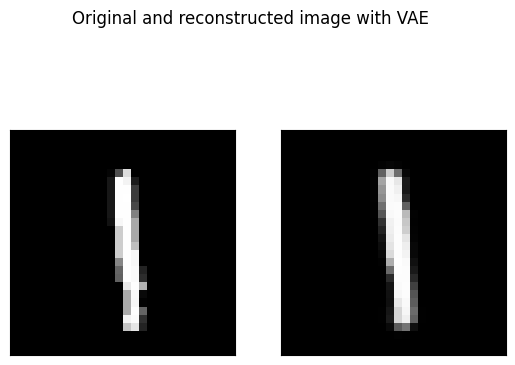

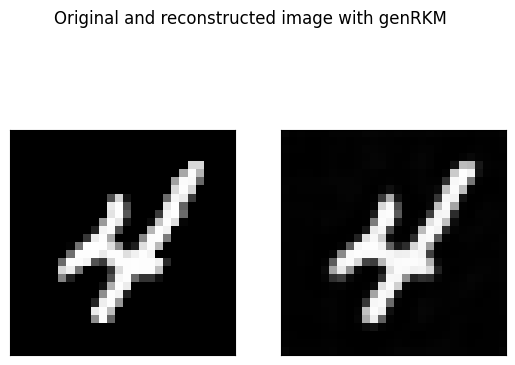

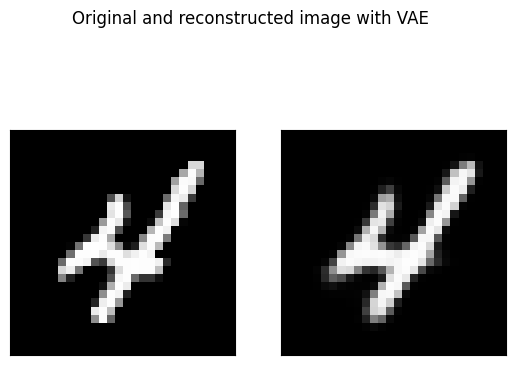

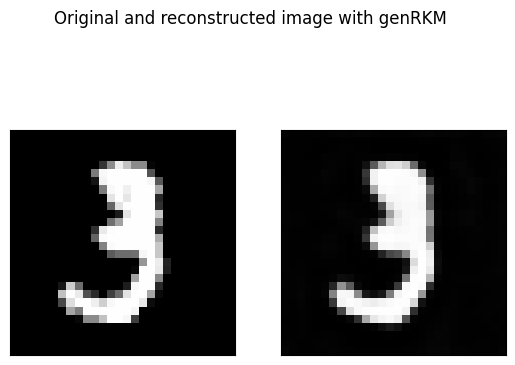

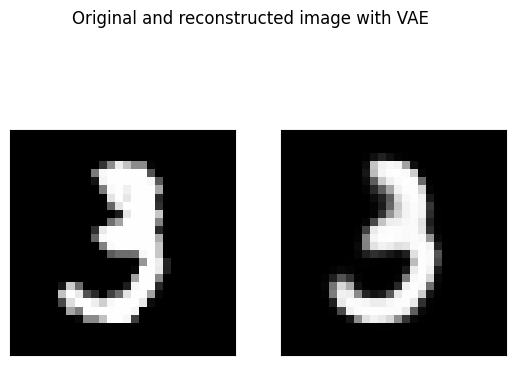

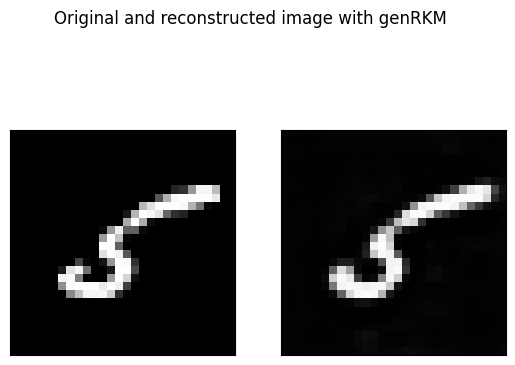

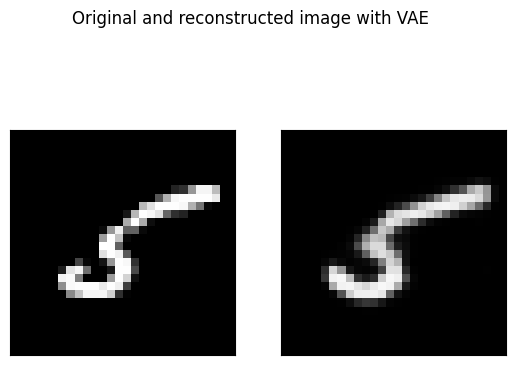

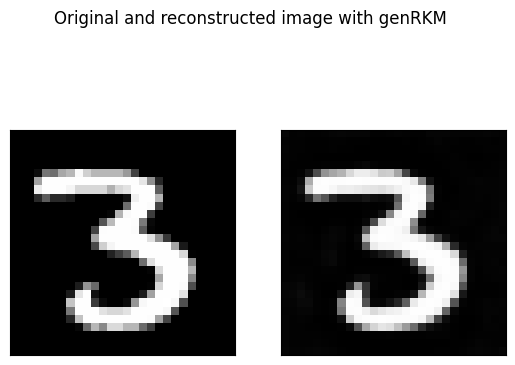

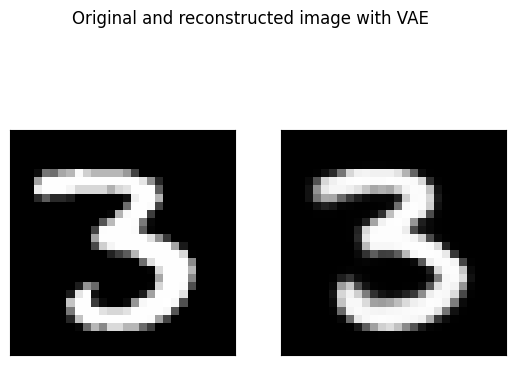

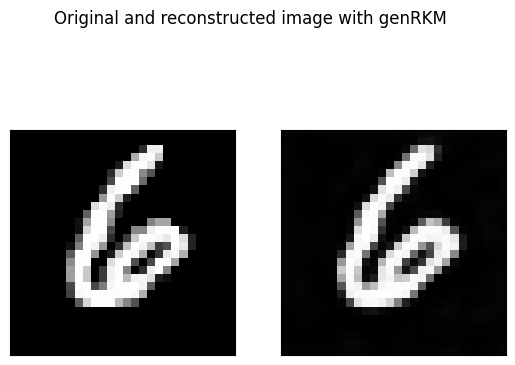

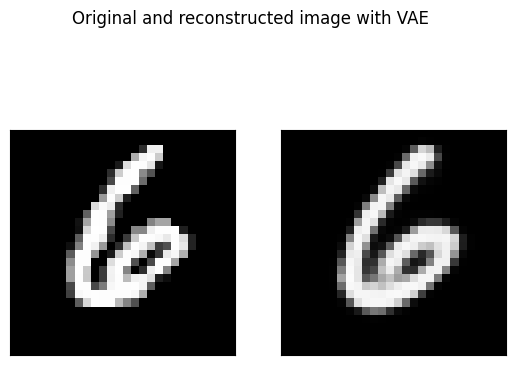

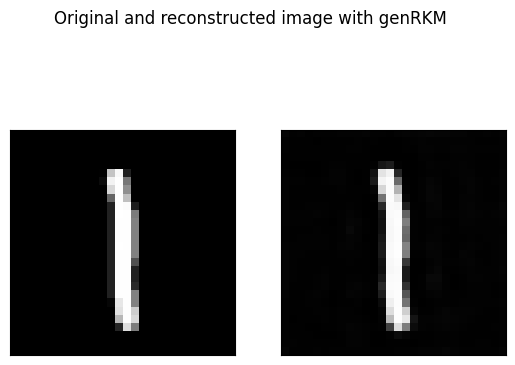

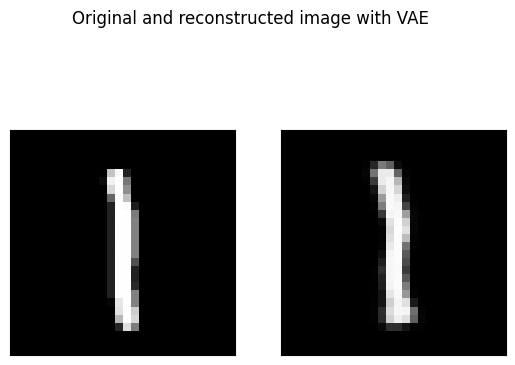

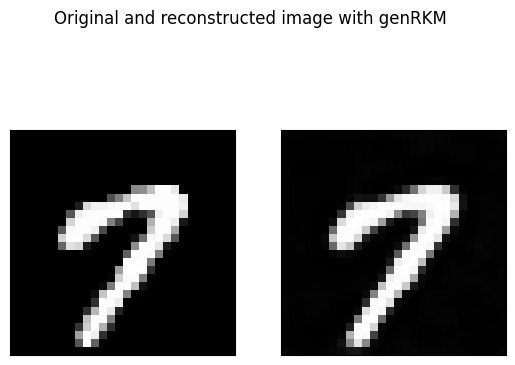

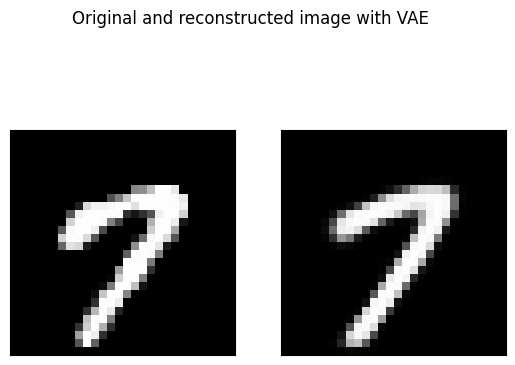

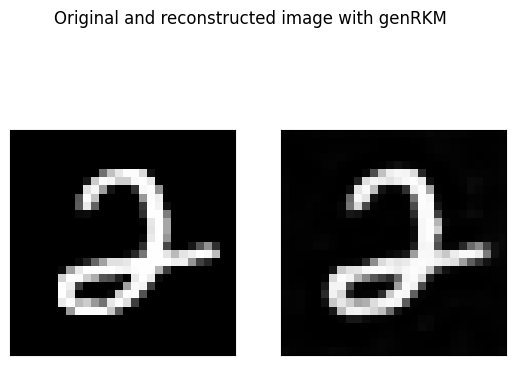

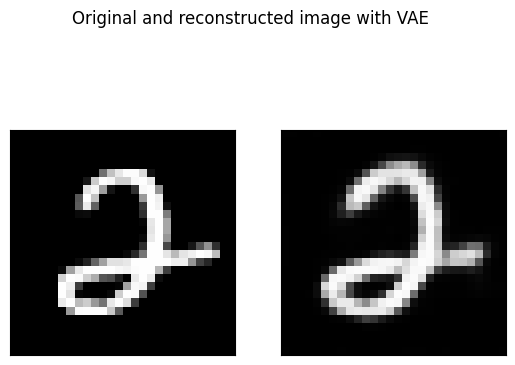

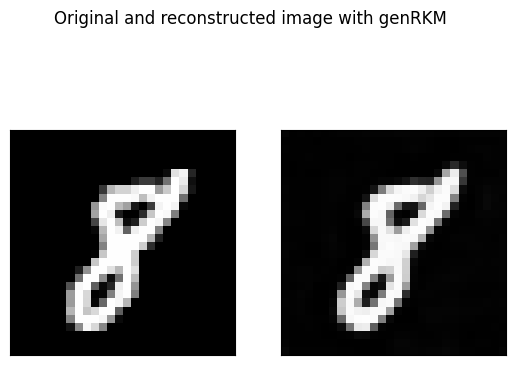

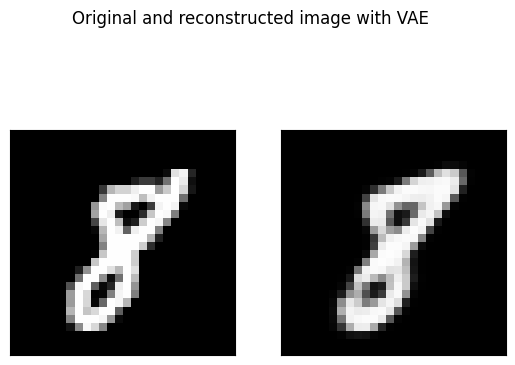

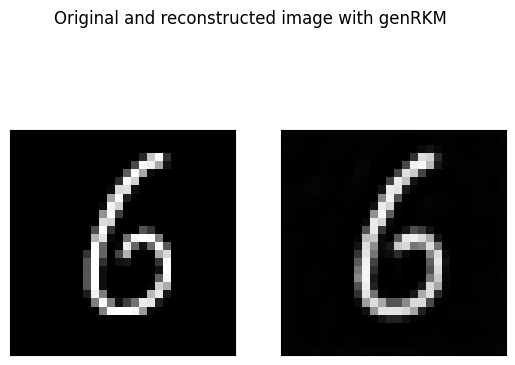

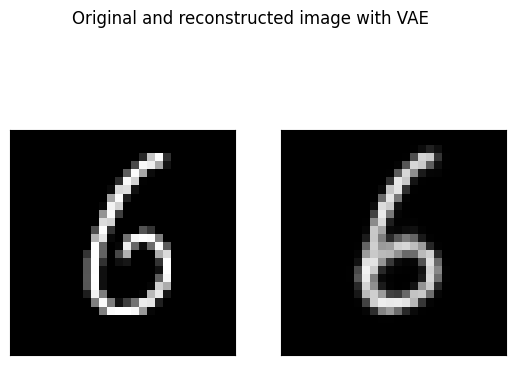

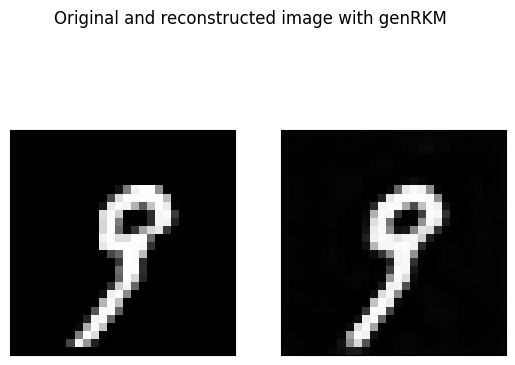

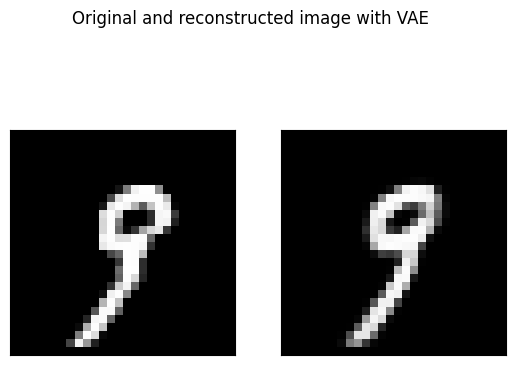

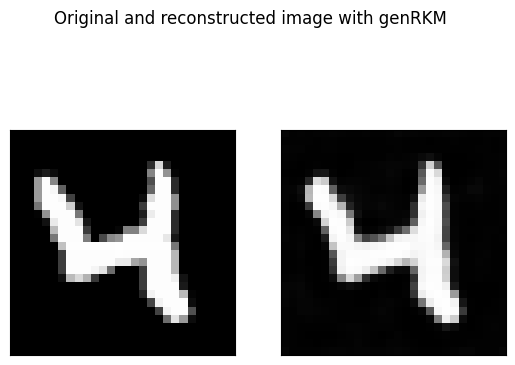

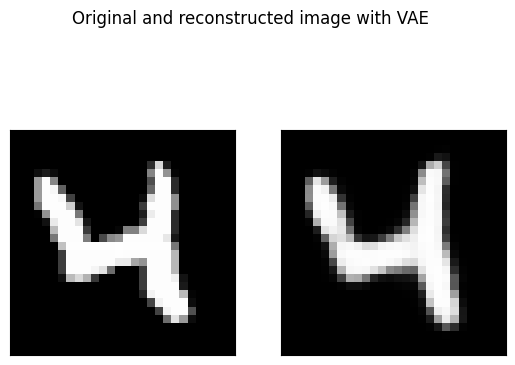

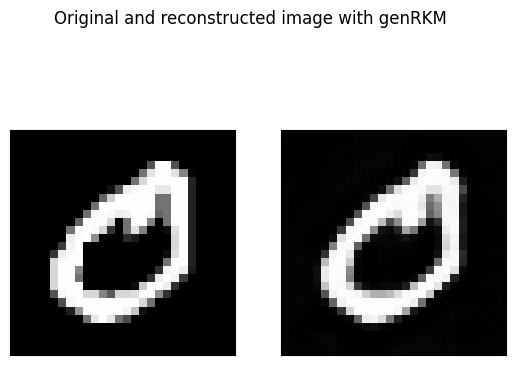

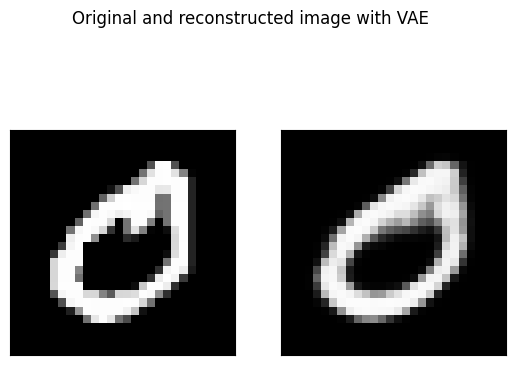

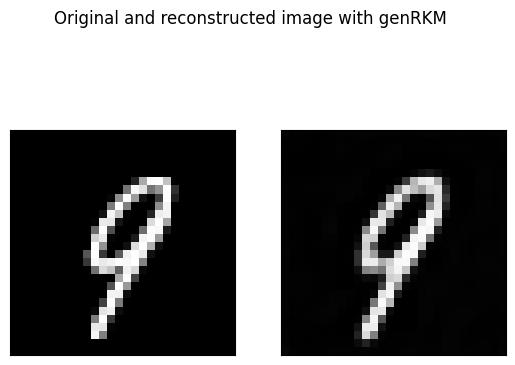

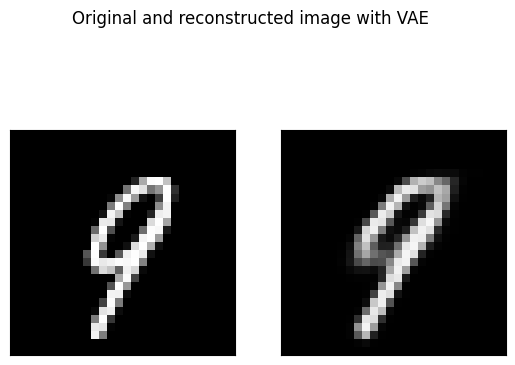

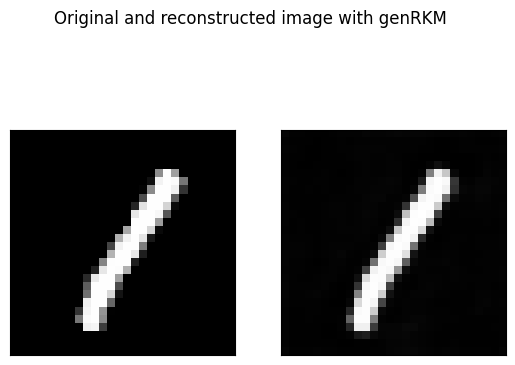

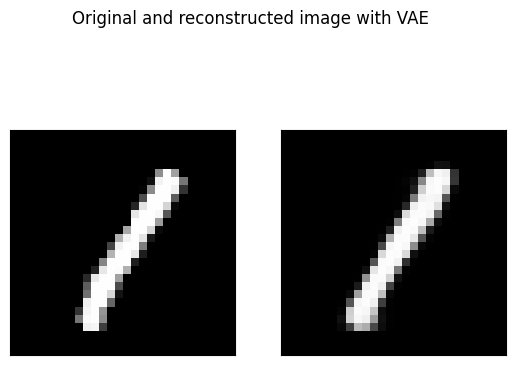

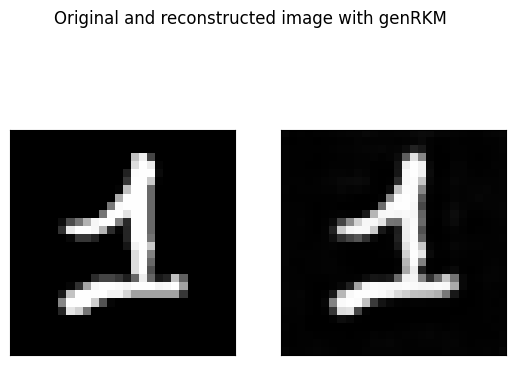

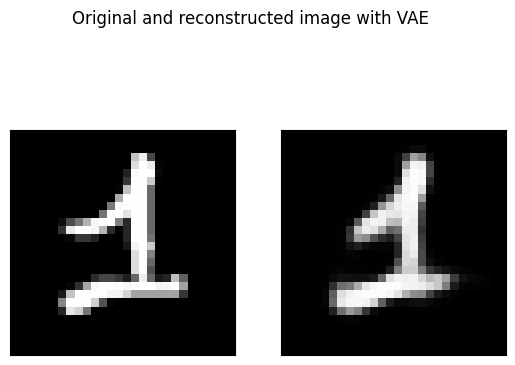

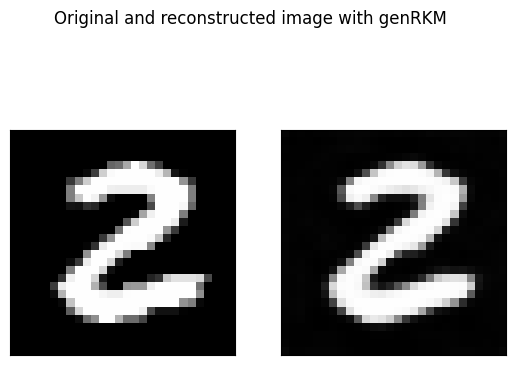

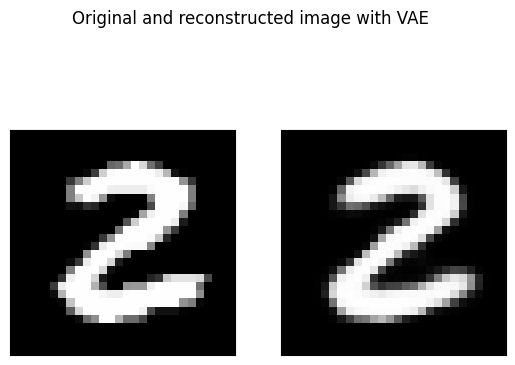

In [3]:
for image in range(26):
    attack_genRKM.adversarial_attack(image, 0, 0.5, 0.1, False)
    attack_VAE.adversarial_attack(image, 0, 0.5, 0.1, False)

    attack_genRKM.plot_ori_back()
    attack_VAE.plot_ori_back()

<h2> Assess the performance with perturbation</h2>

In [4]:
nbr_images = 25

lpips_input_VAE_set = []
lpips_input_genRKM_set = []
lpips_output_VAE_set = []
lpips_output_genRKM_set = []

distortion_input_VAE_set = []
distortion_input_genRKM_set = []
distortion_output_VAE_set = []
distortion_output_genRKM_set = []

ssim_input_VAE_set = []
ssim_input_genRKM_set = []
ssim_output_VAE_set = []
ssim_output_genRKM_set = []

it_VAE_set = []
it_genRKM_set = []

for image in range(nbr_images):
    attack_genRKM.adversarial_attack_target_lim(image, image+1, 3, 0.1, 0.5)
    attack_VAE.adversarial_attack_target_lim(image, image+1, 3, 0.1, 0.5)

    lpips_input_VAE, lpips_output_VAE = attack_VAE.get_lpips_arrays()
    distortion_input_VAE, distortion_output_VAE = attack_VAE.get_distortion_arrays()
    ssim_input_VAE, ssim_output_VAE = attack_VAE.get_ssim_arrays()

    lpips_input_genRKM, lpips_output_genRKM = attack_genRKM.get_lpips_arrays()
    distortion_input_genRKM, distortion_output_genRKM = attack_genRKM.get_distortion_arrays()
    ssim_input_genRKM, ssim_output_genRKM = attack_genRKM.get_ssim_arrays()

    ssim_input_VAE_set.append(ssim_input_VAE)
    ssim_input_genRKM_set.append(ssim_input_genRKM)
    ssim_output_VAE_set.append(ssim_output_VAE)
    ssim_output_genRKM_set.append(ssim_output_genRKM)

    distortion_input_VAE_set.append(distortion_input_VAE)
    distortion_input_genRKM_set.append(distortion_input_genRKM)
    distortion_output_VAE_set.append(distortion_output_VAE)
    distortion_output_genRKM_set.append(distortion_output_genRKM)
    
    lpips_input_VAE_set.append(lpips_input_VAE)
    lpips_input_genRKM_set.append(lpips_input_genRKM)
    lpips_output_VAE_set.append(lpips_output_VAE)
    lpips_output_genRKM_set.append(lpips_output_genRKM)

    it_VAE_set.append(attack_VAE.get_it_attack())
    it_genRKM_set.append(attack_genRKM.get_it_attack())

    print(f"iteration {image} done")

c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\class_Adv_attack_genRKM.py:486: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.image_adv = torch.tensor(self.image_ori, requires_grad=True)


iteration 0 done


KeyboardInterrupt: 

Number of iterations

In [8]:
print(f"VAE iterations {np.mean(it_VAE_set)} and std dev {np.round(np.std(it_VAE_set),2)}")
print(f"genRKM iterations {np.mean(it_genRKM_set)} and std dev {np.round(np.std(it_genRKM_set),2)}")

VAE iterations 13.68 and std dev 4.16
genRKM iterations 9.32 and std dev 1.93


Store the averages at the reference points

In [4]:
#get average output distortion at the end of the attack

reference_points = [0, 0.5, 1, 1.5, 2, 2.5, 3]

lpips_avg_VAE = []
distortion_avg_VAE = []
ssim_avg_VAE = []

lpips_avg_genRKM = []
distortion_avg_genRKM = []
ssim_avg_genRKM = []

lpips_std_dev_VAE = []
distortion_std_dev_VAE = []
ssim_std_dev_VAE = []

lpips_std_dev_genRKM = []
distortion_std_dev_genRKM = []
ssim_std_dev_genRKM = []

All functions needed

In [5]:
def average_first_element(list_of_lists):
    total = 0
    count = 0
    for sublist in list_of_lists:
        if len(sublist) > 0:  # Ensure sublist is not empty
            total += sublist[0]
            count += 1
    if count == 0:
        return 0  # Return 0 if there are no valid sublists
    return total / count

def average_last_element(list_of_lists):
    total = 0
    count = 0
    for sublist in list_of_lists:
        if len(sublist) > 0:  # Ensure sublist is not empty
            total += sublist[-1]
            count += 1
    if count == 0:
        return 0  # Return 0 if there are no valid sublists
    return total / count

def average_and_std_dev_last_element(list_of_lists, show_mean):
    total = 0
    count = 0
    for sublist in list_of_lists:
        if len(sublist) > 0:  # Ensure sublist is not empty
            total += sublist[-1]
            count += 1
    if count == 0:
        return 0, 0  # Return 0 for both average and standard deviation if there are no valid sublists
    mean = total / count

    # Calculate squared differences and sum them up
    squared_diff_sum = 0
    for sublist in list_of_lists:
        if len(sublist) > 0:  # Ensure sublist is not empty
            squared_diff_sum += (sublist[-1] - mean) ** 2

    # Compute the variance (mean of squared differences)
    variance = squared_diff_sum / count

    # Compute the standard deviation (square root of variance)
    std_deviation = math.sqrt(variance)

    if(show_mean):
        return mean
    else:
        return std_deviation
    
def average_element(target, input, output):
    total = 0
    count = 0
    for index_list in range(len(input)):
        min_dist = 999999999
        best_output = 9999999999
        input_array = input[index_list]
        output_array = output[index_list]
        
        for index_inner in range(len(input_array)):
            if(np.abs(input_array[index_inner]-target)<min_dist):
                min_dist = np.abs(input_array[index_inner]-target)
                best_output = output_array[index_inner]
        total += best_output
        count += 1

    return total / count

def average_and_std(target, input, output):
    total = 0
    count = 0
    squared_diff_sum = 0

    best_output_array = []

    for index_list in range(len(input)):
        min_dist = 999999
        best_output = 99999999
        input_array = input[index_list]
        output_array = output[index_list]
        
        for index_inner in range(len(input_array)):
            if np.abs(input_array[index_inner] - target) < min_dist:
                min_dist = np.abs(input_array[index_inner] - target)
                best_output = output_array[index_inner]
        
        best_output_array.append(best_output)
        total += best_output
        count += 1

    # Calculate mean
    mean = total / count

    # Calculate squared differences
    for index_list in range(len(input)):
        input_array = input[index_list]
        output_array = output[index_list]
        
        for best_output_value in best_output_array:
            squared_diff_sum += (best_output_value - mean) ** 2
    
    # Calculate standard deviation
    std_dev = np.sqrt(squared_diff_sum / count)

    return mean, std_dev

def get_elements_close(target, input, output):
    count = 0

    best_output_array = []

    for index_list in range(len(input)):
        min_dist = 999999
        best_output = 99999999
        input_array = input[index_list]
        output_array = output[index_list]
        
        for index_inner in range(len(input_array)):
            if np.abs(input_array[index_inner] - target) < min_dist:
                min_dist = np.abs(input_array[index_inner] - target)
                best_output = output_array[index_inner]
        
        best_output_array.append(best_output)
        count += 1

    return best_output_array

Compute the values at the end of the attack

In [6]:
lpips_avg_VAE.append(average_and_std_dev_last_element(lpips_output_VAE_set, True))
distortion_avg_VAE.append(average_and_std_dev_last_element(distortion_output_VAE_set, True))
ssim_avg_VAE.append(average_and_std_dev_last_element(ssim_output_VAE_set, True))
lpips_avg_genRKM.append(average_and_std_dev_last_element(lpips_output_genRKM_set, True))
distortion_avg_genRKM.append(average_and_std_dev_last_element(distortion_output_genRKM_set, True))
ssim_avg_genRKM.append(average_and_std_dev_last_element(ssim_output_genRKM_set, True))

lpips_std_dev_VAE.append(average_and_std_dev_last_element(lpips_output_VAE_set, False))
distortion_std_dev_VAE.append(average_and_std_dev_last_element(distortion_output_VAE_set, False))
ssim_std_dev_VAE.append(average_and_std_dev_last_element(ssim_output_VAE_set, False))
lpips_std_dev_genRKM.append(average_and_std_dev_last_element(lpips_output_genRKM_set, False))
distortion_std_dev_genRKM.append(average_and_std_dev_last_element(distortion_output_genRKM_set, False))
ssim_std_dev_genRKM.append(average_and_std_dev_last_element(ssim_output_genRKM_set, False))

In [7]:
print(np.round(lpips_avg_VAE[0],4), np.round(distortion_avg_VAE[0],3), np.round(ssim_avg_VAE[0],4), np.round(lpips_avg_genRKM[0],4), np.round(distortion_avg_genRKM[0],3), np.round(ssim_avg_genRKM[0],4))
print()
print(np.round(lpips_std_dev_VAE[0],4), np.round(distortion_std_dev_VAE[0],3), np.round(ssim_std_dev_VAE[0],4), np.round(lpips_std_dev_genRKM[0],4), np.round(distortion_std_dev_genRKM[0],3), np.round(ssim_std_dev_genRKM[0],4))


0.2023 4.945 0.4861 0.3074 6.843 0.3075

0.0362 0.672 0.1124 0.0494 0.976 0.0833


Analyze the distortion

In [ ]:
distortion_avg_VAE = []
distortion_avg_genRKM = []

distortion_std_dev_VAE = []
distortion_std_dev_genRKM = []

for element in reference_points:
    avg_VAE, std_VAE = average_and_std(element, distortion_input_VAE_set, distortion_output_VAE_set)
    avg_genRKM, std_genRKM = average_and_std(element,distortion_input_genRKM_set, distortion_output_genRKM_set)

    distortion_avg_VAE.append(avg_VAE)
    distortion_avg_genRKM.append(avg_genRKM)
    distortion_std_dev_VAE.append(std_VAE)
    distortion_std_dev_genRKM.append(std_genRKM) 


Lists to be able to create the Violin plots

In [10]:
#get elements close

Lists_close_distortion_VAE = []
Lists_close_distortion_genRKM = []

Lists_close_lpips_VAE = []
Lists_close_lpips_genRKM = []

Lists_close_ssim_VAE = []
Lists_close_ssim_genRKM = []

for element in reference_points:
    #print("iteration")
    list_closest_distortion_VAE = get_elements_close(element, distortion_input_VAE_set, distortion_output_VAE_set)
    list_closest_distortion_genRKM = get_elements_close(element, distortion_input_genRKM_set, distortion_output_genRKM_set)

    list_closest_lpips_VAE = get_elements_close(element, distortion_input_VAE_set, lpips_output_VAE_set)
    list_closest_lpips_genRKM = get_elements_close(element, distortion_input_genRKM_set, lpips_output_genRKM_set)

    list_closest_ssim_VAE = get_elements_close(element, distortion_input_VAE_set, ssim_output_VAE_set)
    list_closest_ssim_genRKM = get_elements_close(element, distortion_input_genRKM_set, ssim_output_genRKM_set)


    Lists_close_distortion_VAE.append(list_closest_distortion_VAE)
    Lists_close_distortion_genRKM.append(list_closest_distortion_genRKM)

    Lists_close_lpips_VAE.append(list_closest_lpips_VAE)
    Lists_close_lpips_genRKM.append(list_closest_lpips_genRKM)

    Lists_close_ssim_VAE.append(list_closest_ssim_VAE)
    Lists_close_ssim_genRKM.append(list_closest_ssim_genRKM)

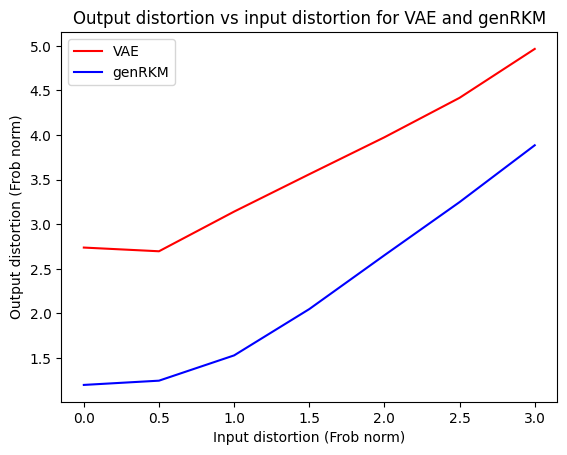

In [11]:
# Plot the curves
plt.plot(reference_points, distortion_avg_VAE, color='red', label='VAE')
plt.plot(reference_points, distortion_avg_genRKM, color='blue', label='genRKM')

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output distortion (Frob norm)')
plt.title('Output distortion vs input distortion for VAE and genRKM')
plt.legend()

# Show plot
plt.show()

In [12]:
reference_matrix = [25*[item] for item in reference_points]
#print((reference_matrix))

traces = []

for i in range(len(reference_points)):

    # Create a trace for the holiday distribution
    trace1 = go.Violin(
        x=reference_matrix[i],
        y=Lists_close_distortion_VAE[i],
        name='VAE' if i == 0 else None,
        side='negative',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Holiday<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='red',  
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0) 
    )

    # Create a trace for the normal day distribution
    trace2 = go.Violin(
        x=reference_matrix[i], #to put the two graphs next to each other instead of separately
        y=Lists_close_distortion_genRKM[i],
        name='genRKM' if i == 0 else None,
        side='positive',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Normal Day<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='blue',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0)
    )

    traces.append(trace1)
    traces.append(trace2)

# Create the layout for the plot
layout_fig1 = go.Layout(
    title=dict(
        text='Distribution of the output distortion for different input distortion levels',
        x=0.5,
        xanchor='center',
        font=dict(color="black", size=24)
    ),
    title_font=dict(size=24, color="black"),  
    xaxis=dict(
        {'title': 'Input distortion'}, 
        range = [-0.2, 3.2],
        #ticktext = ["false",'Holiday - Normal day'],
        title_font=dict(color="black", size = 18),
        tickfont=dict(color='black'),
        showticklabels=True, 
        tickvals = reference_points, 
        ticktext = reference_points,
        gridcolor='black'),
    yaxis=dict(
        {'title': 'Output distortion'},
        title_font=dict(color="black", size = 18),
        tickfont=dict(color="black"),
        #showticklabels=False,
        range = [-0.5, 8],
        tickvals=list(range(11)),
        gridcolor='black',
        zeroline=True,  # Ensure the zeroline is shown
        zerolinecolor='black',  # Set the color of the zeroline to black
        zerolinewidth=1  # Set the width of the zeroline
        ),
    violingap=0,  # Set the gap between violins to 0 for overlapping
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend = dict(font=dict(color='black'))
)

layout_fig1.update(width=800, height=600)

# Create the figure and add the traces
fig1 = go.Figure(data=traces, layout=layout_fig1)

# Show the plot
fig1.show()

In [13]:
traces = []

for i in range(len(reference_points)):

    # Create a trace for the holiday distribution
    trace1 = go.Violin(
        x=reference_matrix[i],
        y=Lists_close_lpips_VAE[i],
        name='VAE' if i == 0 else None,
        side='negative',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Holiday<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='red',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0) 
    )

    # Create a trace for the normal day distribution
    trace2 = go.Violin(
        x=reference_matrix[i], #to put the two graphs next to each other instead of separately
        y=Lists_close_lpips_genRKM[i],
        name='genRKM' if i == 0 else None,
        side='positive',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Normal Day<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='blue',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0)
    )

    traces.append(trace1)
    traces.append(trace2)

# Create the layout for the plot
layout_fig1 = go.Layout(
    title=dict(
        text='Distribution of the output lpips for different input distortion levels',
        x=0.5,
        xanchor='center',
        font=dict(color="black", size=24)
    ),
    title_font=dict(size=24, color="black"),  
    xaxis=dict(
        {'title': 'Input distortion'}, 
        range = [-0.2, 3.2],
        #ticktext = ["false",'Holiday - Normal day'],
        title_font=dict(color="black", size = 18),
        tickfont=dict(color='black'),
        showticklabels=True, 
        tickvals = reference_points, 
        ticktext = reference_points,
        gridcolor='black'),
    yaxis=dict(
        {'title': 'Output lpips'},
        title_font=dict(color="black", size = 18),
        tickfont=dict(color="black"),
        #showticklabels=False,
        range = [-0.1, 0.4],
        tickvals=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
        gridcolor='black',
        zeroline=True,  # Ensure the zeroline is shown
        zerolinecolor='black',  # Set the color of the zeroline to black
        zerolinewidth=1  # Set the width of the zeroline
        ),
    violingap=0,  # Set the gap between violins to 0 for overlapping
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend = dict(font=dict(color='black'))
)

layout_fig1.update(width=800, height=600)

# Create the figure and add the traces
fig1 = go.Figure(data=traces, layout=layout_fig1)

# Show the plot
fig1.show()

In [14]:
traces = []

for i in range(len(reference_points)):

    # Create a trace for the holiday distribution
    trace1 = go.Violin(
        x=reference_matrix[i],
        y=Lists_close_ssim_VAE[i],
        name='VAE' if i == 0 else None,
        side='negative',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Holiday<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='red',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0) 
    )

    # Create a trace for the normal day distribution
    trace2 = go.Violin(
        x=reference_matrix[i], #to put the two graphs next to each other instead of separately
        y=Lists_close_ssim_genRKM[i],
        name='genRKM' if i == 0 else None,
        side='positive',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Normal Day<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='blue',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0)
    )

    traces.append(trace1)
    traces.append(trace2)

# Create the layout for the plot
layout_fig1 = go.Layout(
    title=dict(
        text='Distribution of the output ssim for different input distortion levels',
        x=0.5,
        xanchor='center',
        font=dict(color="black", size=24)
    ),
    title_font=dict(size=24, color="black"),  
    xaxis=dict(
        {'title': 'Input distortion'}, 
        range = [-0.2, 3.2],
        #ticktext = ["false",'Holiday - Normal day'],
        title_font=dict(color="black", size = 18),
        tickfont=dict(color='black'),
        showticklabels=True, 
        tickvals = reference_points, 
        ticktext = reference_points,
        gridcolor='black'),
    yaxis=dict(
        {'title': 'Output ssim'},
        title_font=dict(color="black", size = 18),
        tickfont=dict(color="black"),
        #showticklabels=False,
        range = [0, 1],
        tickvals=[-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 1],
        gridcolor='black',
        zeroline=True,  # Ensure the zeroline is shown
        zerolinecolor='black',  # Set the color of the zeroline to black
        zerolinewidth=1  # Set the width of the zeroline
        ),
    violingap=0,  # Set the gap between violins to 0 for overlapping
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend = dict(font=dict(color='black'))
)

layout_fig1.update(width=800, height=600)

# Create the figure and add the traces
fig1 = go.Figure(data=traces, layout=layout_fig1)

# Show the plot
fig1.show()

Visualize the difference between VAE and genRKM for 6 images that were attacked

c:\Users\gcorl\OneDrive\Documents\KUL\Master 2\Master thesis\Programming\Restricted_Kernel_Machines_Demo_MNIST\class_Adv_attack_genRKM.py:474: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.image_adv = torch.tensor(self.image_ori, requires_grad=True)


genRKM (0.17525853216648102, 3.65067537609447, 0.7124488353729248)


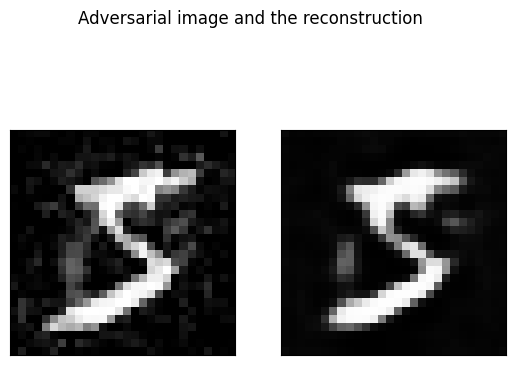

VAE (0.2275107502937317, 4.921192050472918, 0.6112337708473206)


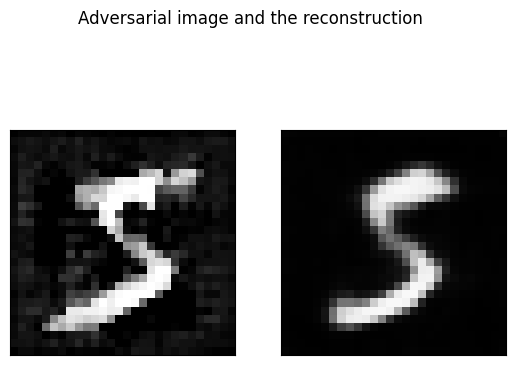

genRKM (0.10440804809331894, 4.186824533989059, 0.7667754292488098)


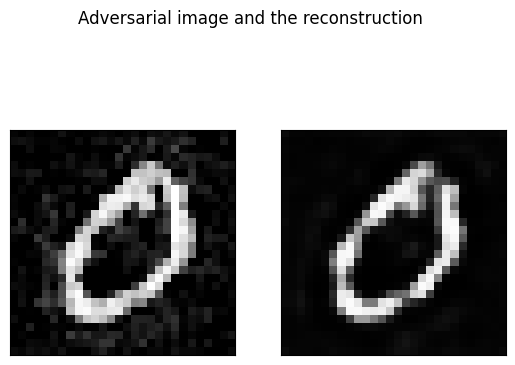

VAE (0.13135167956352234, 4.766558732599315, 0.6507658362388611)


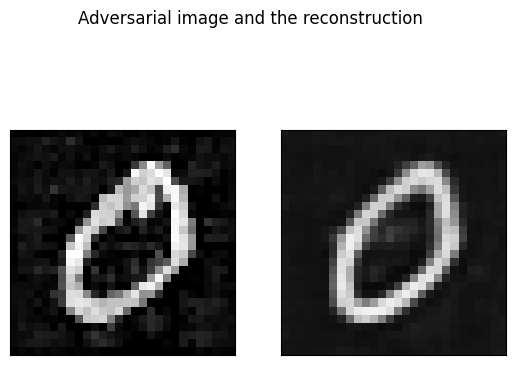

genRKM (0.25502467155456543, 5.267945965221869, 0.4428170621395111)


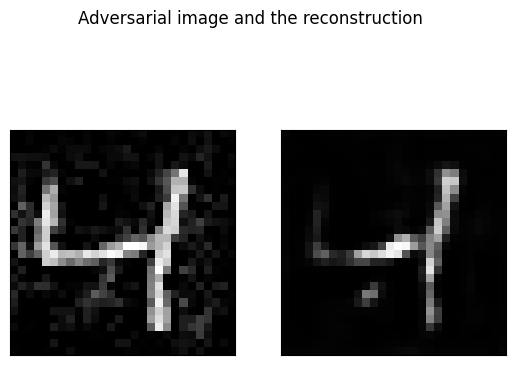

VAE (0.1884908825159073, 4.41125191696818, 0.6102039813995361)


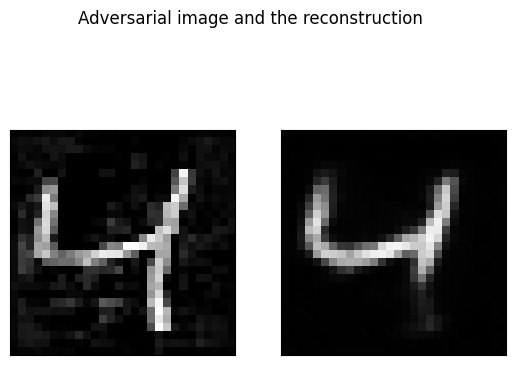

genRKM (0.22991599142551422, 4.176515948059192, 0.42601925134658813)


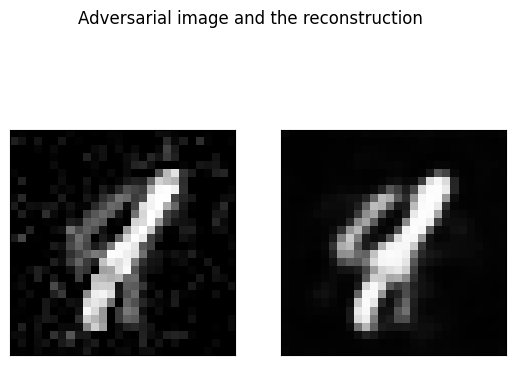

VAE (0.18358668684959412, 4.235517137262989, 0.37824416160583496)


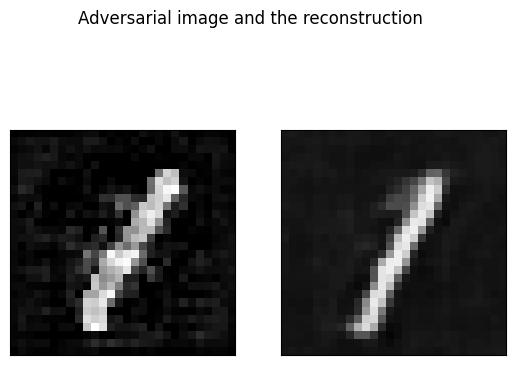

genRKM (0.12834587693214417, 3.824726132000081, 0.6689320802688599)


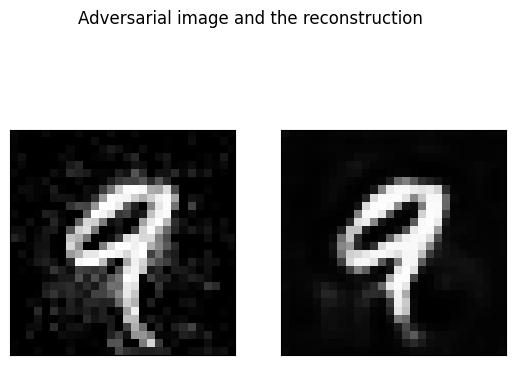

VAE (0.1503990739583969, 4.135832251703807, 0.5788358449935913)


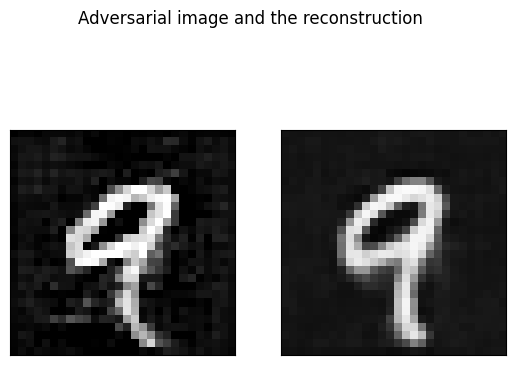

genRKM (0.1164122223854065, 4.540568232622216, 0.7101364731788635)


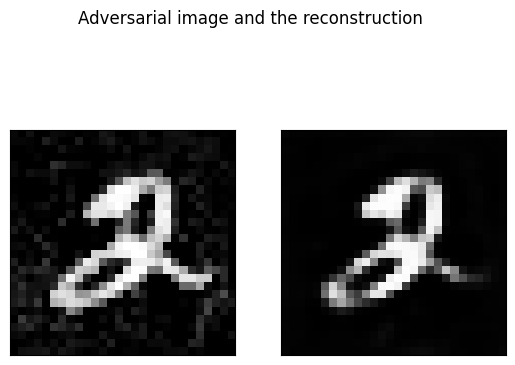

VAE (0.2628668546676636, 5.761465413655501, 0.4885292649269104)


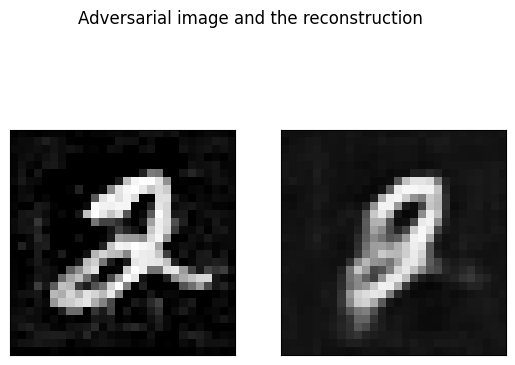

In [3]:
for image in range(6):
    attack_genRKM.adversarial_attack_target_lim(image, image+1, 3, 0.1, 0.5)
    attack_VAE.adversarial_attack_target_lim(image, image+1, 3, 0.1, 0.5)

    

    _, output_lpips_genRKM = attack_genRKM.get_lpips_arrays()
    _, output_distortion_genRKM = attack_genRKM.get_distortion_arrays()
    _, output_ssim_genRKM = attack_genRKM.get_ssim_arrays()
    _, output_lpips_VAE = attack_VAE.get_lpips_arrays()
    _, output_distortion_VAE = attack_VAE.get_distortion_arrays()
    _, output_ssim_VAE = attack_VAE.get_ssim_arrays()

    print(f"genRKM {output_lpips_genRKM[-1], output_distortion_genRKM[-1], output_ssim_genRKM[-1]}")
    

    attack_genRKM.plot_adv_back()

    print(f"VAE {output_lpips_VAE[-1], output_distortion_VAE[-1], output_ssim_VAE[-1]}")
    attack_VAE.plot_adv_back()


On images that were not seen during the training phase

genRKM (0.12688682973384857, 4.492901359332508, 0.7462678551673889)


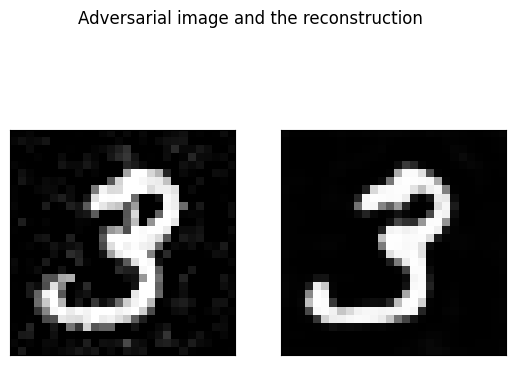

VAE (0.2010166049003601, 6.326919950887083, 0.49368494749069214)


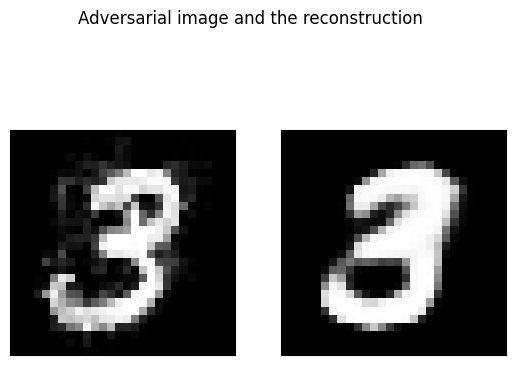

genRKM (0.1176685094833374, 4.138674877257698, 0.690889298915863)


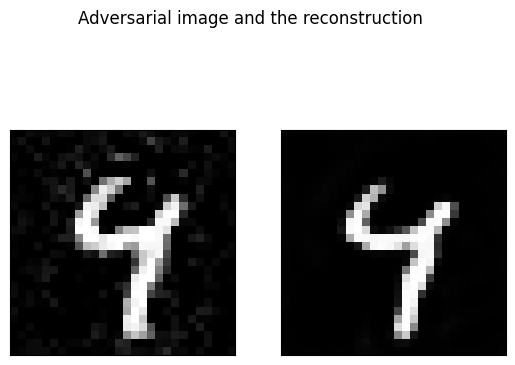

VAE (0.1818276047706604, 5.066828989392752, 0.5016821026802063)


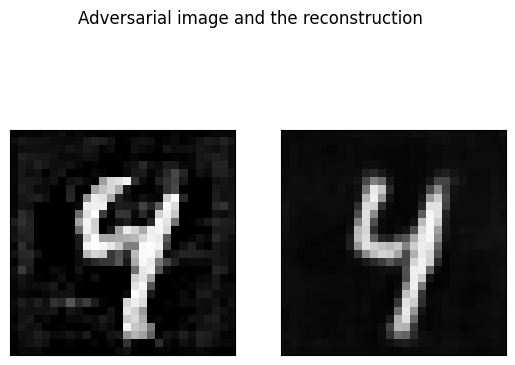

genRKM (0.1253477931022644, 4.345145906399813, 0.671886146068573)


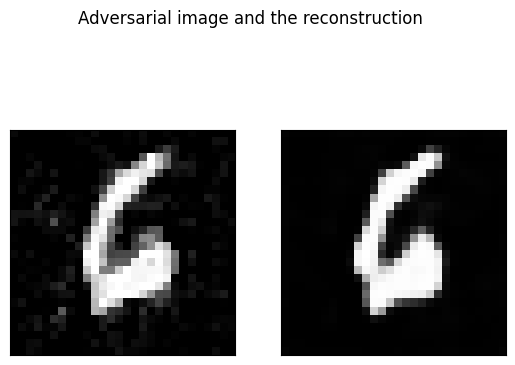

VAE (0.22916260361671448, 7.095268634488478, 0.41823098063468933)


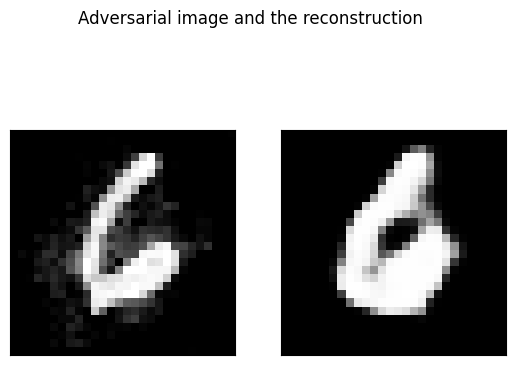

genRKM (0.15291374921798706, 3.8438266042852827, 0.45973286032676697)


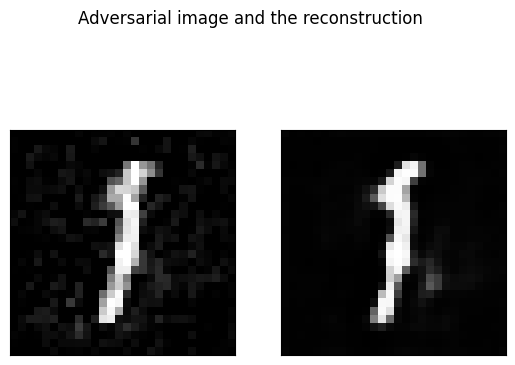

VAE (0.19172048568725586, 4.416267125339919, 0.293182373046875)


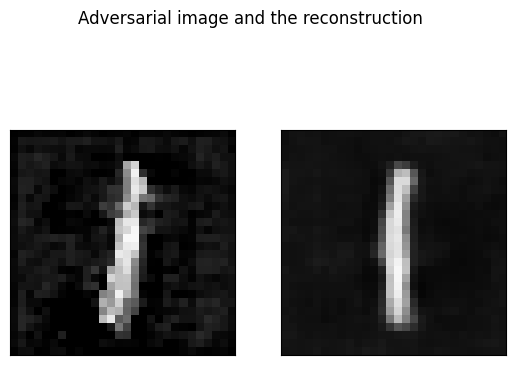

genRKM (0.09106684476137161, 4.272611232040047, 0.7670802474021912)


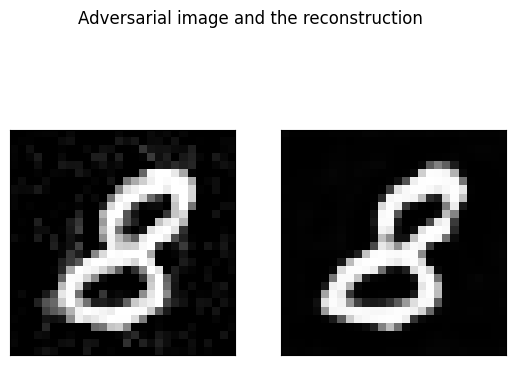

VAE (0.14959515631198883, 5.863485036975137, 0.4995531141757965)


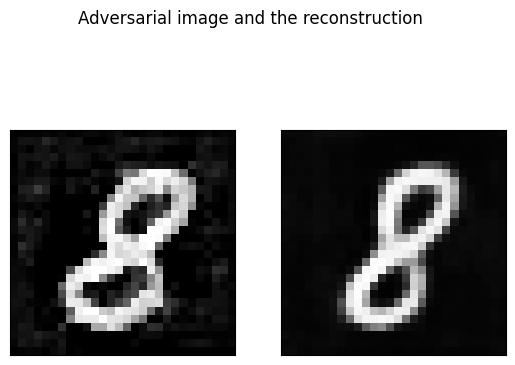

genRKM (0.15082016587257385, 4.424994256655858, 0.5349282622337341)


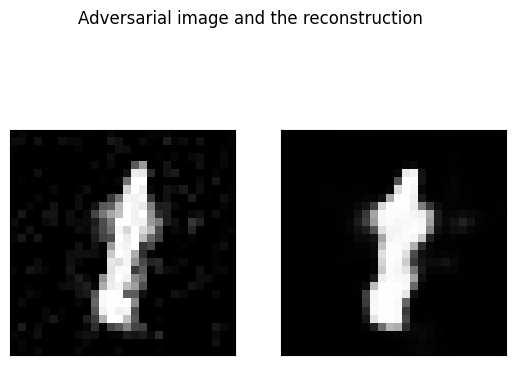

VAE (0.14789482951164246, 5.1911084419055165, 0.5558785796165466)


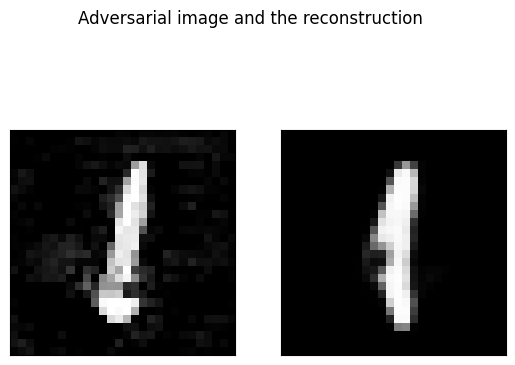

In [72]:
for image in range(6):
    attack_genRKM.adversarial_attack_lim(image+5001, 3, 0.1, 0.1, False)
    attack_VAE.adversarial_attack_lim(image+5001, 3, 0.1, 0.1, False)

    

    _, output_lpips_genRKM = attack_genRKM.get_lpips_arrays()
    _, output_distortion_genRKM = attack_genRKM.get_distortion_arrays()
    _, output_ssim_genRKM = attack_genRKM.get_ssim_arrays()
    _, output_lpips_VAE = attack_VAE.get_lpips_arrays()
    _, output_distortion_VAE = attack_VAE.get_distortion_arrays()
    _, output_ssim_VAE = attack_VAE.get_ssim_arrays()

    print(f"genRKM {output_lpips_genRKM[-1], output_distortion_genRKM[-1], output_ssim_genRKM[-1]}")
    

    attack_genRKM.plot_adv_back()

    print(f"VAE {output_lpips_VAE[-1], output_distortion_VAE[-1], output_ssim_VAE[-1]}")
    attack_VAE.plot_adv_back()

Curve for LPIPS

In [15]:
lpips_avg_VAE = []
lpips_avg_genRKM = []

lpips_std_dev_VAE = []
lpips_std_dev_genRKM = []

for element in reference_points:
    avg_VAE, std_VAE = average_and_std(element, distortion_input_VAE_set, lpips_output_VAE_set)
    avg_genRKM, std_genRKM = average_and_std(element,distortion_input_genRKM_set, lpips_output_genRKM_set)

    lpips_avg_VAE.append(avg_VAE)
    lpips_avg_genRKM.append(avg_genRKM)
    lpips_std_dev_VAE.append(std_VAE)
    lpips_std_dev_genRKM.append(std_genRKM) 

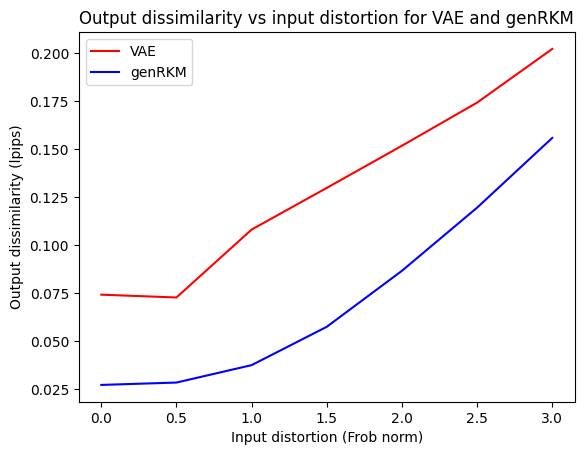

In [16]:
# Plot the curves
plt.plot(reference_points, lpips_avg_VAE, color='red', label='VAE')
plt.plot(reference_points, lpips_avg_genRKM, color='blue', label='genRKM')

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output dissimilarity (lpips)')
plt.title('Output dissimilarity vs input distortion for VAE and genRKM')
plt.legend()

# Show plot
plt.show()

Curve for SSIM

In [17]:
ssim_avg_VAE = []
ssim_avg_genRKM = []

ssim_std_dev_VAE = []
ssim_std_dev_genRKM = []

for element in reference_points:
    avg_VAE, std_VAE = average_and_std(element, distortion_input_VAE_set, ssim_output_VAE_set)
    avg_genRKM, std_genRKM = average_and_std(element,distortion_input_genRKM_set, ssim_output_genRKM_set)

    ssim_avg_VAE.append(avg_VAE)
    ssim_avg_genRKM.append(avg_genRKM)
    ssim_std_dev_VAE.append(std_VAE)
    ssim_std_dev_genRKM.append(std_genRKM) 

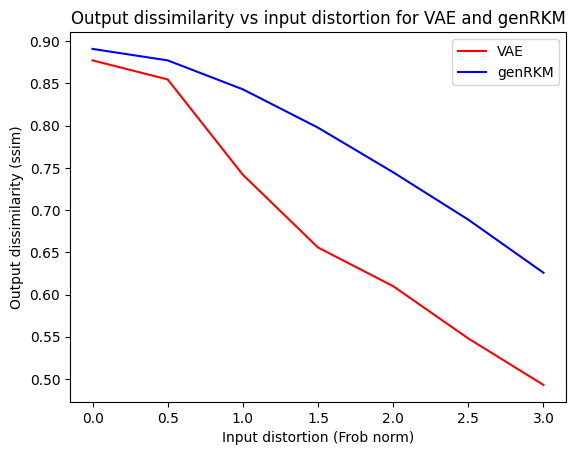

In [18]:
# Plot the curves
plt.plot(reference_points, ssim_avg_VAE, color='red', label='VAE')
plt.plot(reference_points, ssim_avg_genRKM, color='blue', label='genRKM')

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output dissimilarity (ssim)')
plt.title('Output dissimilarity vs input distortion for VAE and genRKM')
plt.legend()

# Show plot
plt.show()

<h2> For the test set </h2>

In [77]:
nbr_images = 25

lpips_input_VAE_set_t = []
lpips_input_genRKM_set_t = []
lpips_output_VAE_set_t = []
lpips_output_genRKM_set_t = []

distortion_input_VAE_set_t = []
distortion_input_genRKM_set_t = []
distortion_output_VAE_set_t = []
distortion_output_genRKM_set_t = []

ssim_input_VAE_set_t = []
ssim_input_genRKM_set_t = []
ssim_output_VAE_set_t = []
ssim_output_genRKM_set_t = []

it_VAE_set_t = []
it_genRKM_set_t = []

for image in range(5001, 5001+nbr_images):
    attack_genRKM.adversarial_attack_lim(image, 3, 0.1, 0.1, False)
    attack_VAE.adversarial_attack_lim(image, 3, 0.1, 0.1, False)

    lpips_input_VAE_t, lpips_output_VAE_t = attack_VAE.get_lpips_arrays()
    distortion_input_VAE_t, distortion_output_VAE_t = attack_VAE.get_distortion_arrays()
    ssim_input_VAE_t, ssim_output_VAE_t = attack_VAE.get_ssim_arrays()

    lpips_input_genRKM_t, lpips_output_genRKM_t = attack_genRKM.get_lpips_arrays()
    distortion_input_genRKM_t, distortion_output_genRKM_t = attack_genRKM.get_distortion_arrays()
    ssim_input_genRKM_t, ssim_output_genRKM_t = attack_genRKM.get_ssim_arrays()

    ssim_input_VAE_set_t.append(ssim_input_VAE_t)
    ssim_input_genRKM_set_t.append(ssim_input_genRKM_t)
    ssim_output_VAE_set_t.append(ssim_output_VAE_t)
    ssim_output_genRKM_set_t.append(ssim_output_genRKM_t)

    distortion_input_VAE_set_t.append(distortion_input_VAE_t)
    distortion_input_genRKM_set_t.append(distortion_input_genRKM_t)
    distortion_output_VAE_set_t.append(distortion_output_VAE_t)
    distortion_output_genRKM_set_t.append(distortion_output_genRKM_t)
    
    lpips_input_VAE_set_t.append(lpips_input_VAE_t)
    lpips_input_genRKM_set_t.append(lpips_input_genRKM_t)
    lpips_output_VAE_set_t.append(lpips_output_VAE_t)
    lpips_output_genRKM_set_t.append(lpips_output_genRKM_t)

    it_VAE_set_t.append(attack_VAE.get_it_attack())
    it_genRKM_set_t.append(attack_genRKM.get_it_attack())

    print(f"iteration {image} done")

iteration 5001 done
iteration 5002 done
iteration 5003 done
iteration 5004 done
iteration 5005 done
iteration 5006 done
iteration 5007 done
iteration 5008 done
iteration 5009 done
iteration 5010 done
iteration 5011 done
iteration 5012 done
iteration 5013 done
iteration 5014 done
iteration 5015 done
iteration 5016 done
iteration 5017 done
iteration 5018 done
iteration 5019 done
iteration 5020 done
iteration 5021 done
iteration 5022 done
iteration 5023 done
iteration 5024 done
iteration 5025 done


Number of iterations

In [78]:
print(f"VAE iterations {np.mean(it_VAE_set_t)} and std dev {np.round(np.std(it_VAE_set_t),2)}")
print(f"genRKM iterations {np.mean(it_genRKM_set_t)} and std dev {np.round(np.std(it_genRKM_set_t),2)}")

VAE iterations 41.52 and std dev 7.01
genRKM iterations 39.24 and std dev 4.39


Store the averages

In [79]:
#get average output distortion at the end of the attack

lpips_avg_VAE_t = []
distortion_avg_VAE_t = []
ssim_avg_VAE_t = []

lpips_avg_genRKM_t = []
distortion_avg_genRKM_t = []
ssim_avg_genRKM_t = []

lpips_std_dev_VAE_t = []
distortion_std_dev_VAE_t = []
ssim_std_dev_VAE_t = []

lpips_std_dev_genRKM_t = []
distortion_std_dev_genRKM_t = []
ssim_std_dev_genRKM_t = []

Compute the values at the end of the attack

In [80]:
lpips_avg_VAE_t.append(average_and_std_dev_last_element(lpips_output_VAE_set_t, True))
distortion_avg_VAE_t.append(average_and_std_dev_last_element(distortion_output_VAE_set_t, True))
ssim_avg_VAE_t.append(average_and_std_dev_last_element(ssim_output_VAE_set_t, True))
lpips_avg_genRKM_t.append(average_and_std_dev_last_element(lpips_output_genRKM_set_t, True))
distortion_avg_genRKM_t.append(average_and_std_dev_last_element(distortion_output_genRKM_set_t, True))
ssim_avg_genRKM_t.append(average_and_std_dev_last_element(ssim_output_genRKM_set_t, True))

lpips_std_dev_VAE_t.append(average_and_std_dev_last_element(lpips_output_VAE_set_t, False))
distortion_std_dev_VAE_t.append(average_and_std_dev_last_element(distortion_output_VAE_set_t, False))
ssim_std_dev_VAE_t.append(average_and_std_dev_last_element(ssim_output_VAE_set_t, False))
lpips_std_dev_genRKM_t.append(average_and_std_dev_last_element(lpips_output_genRKM_set_t, False))
distortion_std_dev_genRKM_t.append(average_and_std_dev_last_element(distortion_output_genRKM_set_t, False))
ssim_std_dev_genRKM_t.append(average_and_std_dev_last_element(ssim_output_genRKM_set_t, False))

In [81]:
print(np.round(lpips_avg_VAE_t[0],4), np.round(distortion_avg_VAE_t[0],3), np.round(ssim_avg_VAE_t[0],4), np.round(lpips_avg_genRKM_t[0],4), np.round(distortion_avg_genRKM_t[0],3), np.round(ssim_avg_genRKM_t[0],4))
print()
print(np.round(lpips_std_dev_VAE_t[0],4), np.round(distortion_std_dev_VAE_t[0],3), np.round(ssim_std_dev_VAE_t[0],4), np.round(lpips_std_dev_genRKM_t[0],4), np.round(distortion_std_dev_genRKM_t[0],3), np.round(ssim_std_dev_genRKM_t[0],4))


0.1986 5.911 0.5089 0.1382 4.415 0.672

0.0469 0.804 0.134 0.0359 0.297 0.1194


Analyze the distortion

In [82]:
distortion_avg_VAE_t = []
distortion_avg_genRKM_t = []

distortion_std_dev_VAE_t = []
distortion_std_dev_genRKM_t = []

for element in reference_points:
    avg_VAE_t, std_VAE_t = average_and_std(element, distortion_input_VAE_set_t, distortion_output_VAE_set_t)
    avg_genRKM_t, std_genRKM_t = average_and_std(element,distortion_input_genRKM_set_t, distortion_output_genRKM_set_t)

    distortion_avg_VAE_t.append(avg_VAE_t)
    distortion_avg_genRKM_t.append(avg_genRKM_t)
    distortion_std_dev_VAE_t.append(std_VAE_t)
    distortion_std_dev_genRKM_t.append(std_genRKM_t) 

Lists for the violin plots

In [83]:
#get elements close

Lists_close_distortion_VAE_t = []
Lists_close_distortion_genRKM_t = []

Lists_close_lpips_VAE_t = []
Lists_close_lpips_genRKM_t = []

Lists_close_ssim_VAE_t = []
Lists_close_ssim_genRKM_t = []

for element in reference_points:
    #print("iteration")
    list_closest_distortion_VAE_t = get_elements_close(element, distortion_input_VAE_set_t, distortion_output_VAE_set_t)
    list_closest_distortion_genRKM_t = get_elements_close(element, distortion_input_genRKM_set_t, distortion_output_genRKM_set_t)

    list_closest_lpips_VAE_t = get_elements_close(element, distortion_input_VAE_set_t, lpips_output_VAE_set_t)
    list_closest_lpips_genRKM_t = get_elements_close(element, distortion_input_genRKM_set_t, lpips_output_genRKM_set_t)

    list_closest_ssim_VAE_t = get_elements_close(element, distortion_input_VAE_set_t, ssim_output_VAE_set_t)
    list_closest_ssim_genRKM_t = get_elements_close(element, distortion_input_genRKM_set_t, ssim_output_genRKM_set_t)


    Lists_close_distortion_VAE_t.append(list_closest_distortion_VAE_t)
    Lists_close_distortion_genRKM_t.append(list_closest_distortion_genRKM_t)

    Lists_close_lpips_VAE_t.append(list_closest_lpips_VAE_t)
    Lists_close_lpips_genRKM_t.append(list_closest_lpips_genRKM_t)

    Lists_close_ssim_VAE_t.append(list_closest_ssim_VAE_t)
    Lists_close_ssim_genRKM_t.append(list_closest_ssim_genRKM_t)

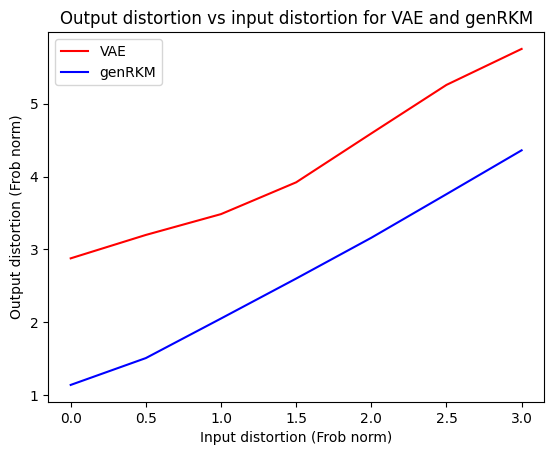

In [84]:
# Plot the curves
plt.plot(reference_points, distortion_avg_VAE_t, color='red', label='VAE')
plt.plot(reference_points, distortion_avg_genRKM_t, color='blue', label='genRKM')

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output distortion (Frob norm)')
plt.title('Output distortion vs input distortion for VAE and genRKM')
plt.legend()

# Show plot
plt.show()

In [85]:
reference_matrix = [25*[item] for item in reference_points]
#print((reference_matrix))

traces = []

for i in range(len(reference_points)):

    # Create a trace for the holiday distribution
    trace1 = go.Violin(
        x=reference_matrix[i],
        y=Lists_close_distortion_VAE_t[i],
        name='VAE' if i == 0 else None,
        side='negative',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Holiday<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='red',  
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0) 
    )

    # Create a trace for the normal day distribution
    trace2 = go.Violin(
        x=reference_matrix[i], #to put the two graphs next to each other instead of separately
        y=Lists_close_distortion_genRKM_t[i],
        name='genRKM' if i == 0 else None,
        side='positive',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Normal Day<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='blue',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0)
    )

    traces.append(trace1)
    traces.append(trace2)

# Create the layout for the plot
layout_fig1 = go.Layout(
    title=dict(
        text='Distribution of the output distortion for different input distortion levels',
        x=0.5,
        xanchor='center',
        font=dict(color="black", size=24)
    ),
    title_font=dict(size=24, color="black"),  
    xaxis=dict(
        {'title': 'Input distortion'}, 
        range = [-0.2, 3.2],
        #ticktext = ["false",'Holiday - Normal day'],
        title_font=dict(color="black", size = 18),
        tickfont=dict(color='black'),
        showticklabels=True, 
        tickvals = reference_points, 
        ticktext = reference_points,
        gridcolor='black'),
    yaxis=dict(
        {'title': 'Output distortion'},
        title_font=dict(color="black", size = 18),
        tickfont=dict(color="black"),
        #showticklabels=False,
        range = [-0.5, 10],
        tickvals=list(range(11)),
        gridcolor='black',
        zeroline=True,  # Ensure the zeroline is shown
        zerolinecolor='black',  # Set the color of the zeroline to black
        zerolinewidth=1  # Set the width of the zeroline
        ),
    violingap=0,  # Set the gap between violins to 0 for overlapping
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend = dict(font=dict(color='black'))
)

layout_fig1.update(width=800, height=600)

# Create the figure and add the traces
fig1 = go.Figure(data=traces, layout=layout_fig1)

# Show the plot
fig1.show()

Curve for LPIPS

In [86]:
lpips_avg_VAE_t = []
lpips_avg_genRKM_t = []

lpips_std_dev_VAE_t = []
lpips_std_dev_genRKM_t = []

for element in reference_points:
    avg_VAE_t, std_VAE_t = average_and_std(element, distortion_input_VAE_set_t, lpips_output_VAE_set_t)
    avg_genRKM_t, std_genRKM_t = average_and_std(element,distortion_input_genRKM_set_t, lpips_output_genRKM_set_t)

    lpips_avg_VAE_t.append(avg_VAE_t)
    lpips_avg_genRKM_t.append(avg_genRKM_t)
    lpips_std_dev_VAE_t.append(std_VAE_t)
    lpips_std_dev_genRKM_t.append(std_genRKM_t) 

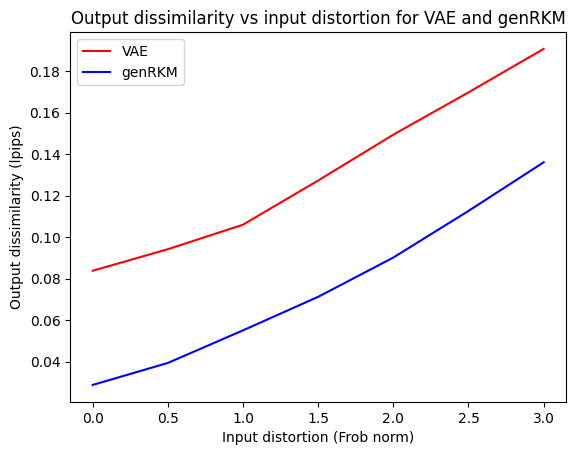

In [87]:
# Plot the curves
plt.plot(reference_points, lpips_avg_VAE_t, color='red', label='VAE')
plt.plot(reference_points, lpips_avg_genRKM_t, color='blue', label='genRKM')

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output dissimilarity (lpips)')
plt.title('Output dissimilarity vs input distortion for VAE and genRKM')
plt.legend()

# Show plot
plt.show()

In [88]:
traces = []

for i in range(len(reference_points)):

    # Create a trace for the holiday distribution
    trace1 = go.Violin(
        x=reference_matrix[i],
        y=Lists_close_lpips_VAE_t[i],
        name='VAE' if i == 0 else None,
        side='negative',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Holiday<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='red',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0) 
    )

    # Create a trace for the normal day distribution
    trace2 = go.Violin(
        x=reference_matrix[i], #to put the two graphs next to each other instead of separately
        y=Lists_close_lpips_genRKM_t[i],
        name='genRKM' if i == 0 else None,
        side='positive',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Normal Day<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='blue',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0)
    )

    traces.append(trace1)
    traces.append(trace2)

# Create the layout for the plot
layout_fig1 = go.Layout(
    title=dict(
        text='Distribution of the output lpips for different input distortion levels',
        x=0.5,
        xanchor='center',
        font=dict(color="black", size=24)
    ),
    title_font=dict(size=24, color="black"),  
    xaxis=dict(
        {'title': 'Input distortion'}, 
        range = [-0.2, 3.2],
        #ticktext = ["false",'Holiday - Normal day'],
        title_font=dict(color="black", size = 18),
        tickfont=dict(color='black'),
        showticklabels=True, 
        tickvals = reference_points, 
        ticktext = reference_points,
        gridcolor='black'),
    yaxis=dict(
        {'title': 'Output lpips'},
        title_font=dict(color="black", size = 18),
        tickfont=dict(color="black"),
        #showticklabels=False,
        range = [-0.1, 0.7],
        tickvals=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
        gridcolor='black',
        zeroline=True,  # Ensure the zeroline is shown
        zerolinecolor='black',  # Set the color of the zeroline to black
        zerolinewidth=1  # Set the width of the zeroline
        ),
    violingap=0,  # Set the gap between violins to 0 for overlapping
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend = dict(font=dict(color='black'))
)

layout_fig1.update(width=800, height=600)

# Create the figure and add the traces
fig1 = go.Figure(data=traces, layout=layout_fig1)

# Show the plot
fig1.show()

Curve for SSIM

In [89]:
ssim_avg_VAE_t = []
ssim_avg_genRKM_t = []

ssim_std_dev_VAE_t = []
ssim_std_dev_genRKM_t = []

for element in reference_points:
    avg_VAE_t, std_VAE_t = average_and_std(element, distortion_input_VAE_set_t, ssim_output_VAE_set_t)
    avg_genRKM_t, std_genRKM_t = average_and_std(element,distortion_input_genRKM_set_t, ssim_output_genRKM_set_t)

    ssim_avg_VAE_t.append(avg_VAE_t)
    ssim_avg_genRKM_t.append(avg_genRKM_t)
    ssim_std_dev_VAE_t.append(std_VAE_t)
    ssim_std_dev_genRKM_t.append(std_genRKM_t) 

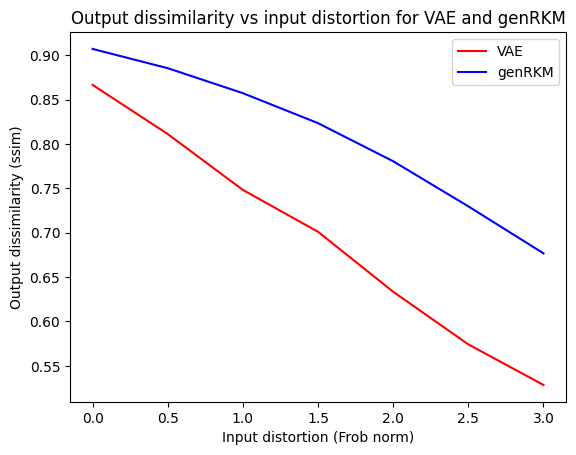

In [90]:
# Plot the curves
plt.plot(reference_points, ssim_avg_VAE_t, color='red', label='VAE')
plt.plot(reference_points, ssim_avg_genRKM_t, color='blue', label='genRKM')

# Add labels and legend
plt.xlabel('Input distortion (Frob norm)')
plt.ylabel('Output dissimilarity (ssim)')
plt.title('Output dissimilarity vs input distortion for VAE and genRKM')
plt.legend()

# Show plot
plt.show()

In [91]:
traces = []

for i in range(len(reference_points)):

    # Create a trace for the holiday distribution
    trace1 = go.Violin(
        x=reference_matrix[i],
        y=Lists_close_ssim_VAE_t[i],
        name='VAE' if i == 0 else None,
        side='negative',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Holiday<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='red',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0) 
    )

    # Create a trace for the normal day distribution
    trace2 = go.Violin(
        x=reference_matrix[i], #to put the two graphs next to each other instead of separately
        y=Lists_close_ssim_genRKM_t[i],
        name='genRKM' if i == 0 else None,
        side='positive',
        box_visible=True,
        meanline_visible=True,
        #hovertemplate='Normal Day<br>Noise Level: %{y.2f} dB(A)',
        #hoverlabel=dict(namelength=0),
        fillcolor='blue',
        line=dict(color='rgba(0, 0, 0, 0.8)', width=1) ,
        showlegend=(i == 0)
    )

    traces.append(trace1)
    traces.append(trace2)

# Create the layout for the plot
layout_fig1 = go.Layout(
    title=dict(
        text='Distribution of the output ssim for different input distortion levels',
        x=0.5,
        xanchor='center',
        font=dict(color="black", size=24)
    ),
    title_font=dict(size=24, color="black"),  
    xaxis=dict(
        {'title': 'Input distortion'}, 
        range = [-0.2, 3.2],
        #ticktext = ["false",'Holiday - Normal day'],
        title_font=dict(color="black", size = 18),
        tickfont=dict(color='black'),
        showticklabels=True, 
        tickvals = reference_points, 
        ticktext = reference_points,
        gridcolor='black'),
    yaxis=dict(
        {'title': 'Output ssim'},
        title_font=dict(color="black", size = 18),
        tickfont=dict(color="black"),
        #showticklabels=False,
        range = [-0.15, 1],
        tickvals=[-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 1],
        gridcolor='black',
        zeroline=True,  # Ensure the zeroline is shown
        zerolinecolor='black',  # Set the color of the zeroline to black
        zerolinewidth=1  # Set the width of the zeroline
        ),
    violingap=0,  # Set the gap between violins to 0 for overlapping
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend = dict(font=dict(color='black'))
)

layout_fig1.update(width=800, height=600)

# Create the figure and add the traces
fig1 = go.Figure(data=traces, layout=layout_fig1)

# Show the plot
fig1.show()